<a href="https://colab.research.google.com/github/Hatsuhinode/ML-Algorithm/blob/main/Linear_Regression_Normal_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression using normal equation

In [ ]:
import numpy as np

In [ ]:
# np.random.randn() function generates Gaussian noise.

X=2 * np.random.rand(100,1)
y=4 + 3 * X + np.random.randn(100,1)

In [ ]:
# Adding x0=1 to each instance.
X_b=np.c_[np.ones((100,1)),X]

# Using linear algebra module(np.linalg) to compute matrix inverse.
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The function that we used to generate the data is y = 4 + 3 $x_{1}$ + Gaussian noise

In [ ]:
theta_best

array([[3.75573987],
       [3.16347794]])

## Making prediction

In [ ]:
X_new=np.array([[0],[2]])

# Adding x0=1 to each instance.
X_new_b=np.c_[np.ones((2,1)),X_new]

y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 3.75573987],
       [10.08269575]])

## Plotting model's prediction

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

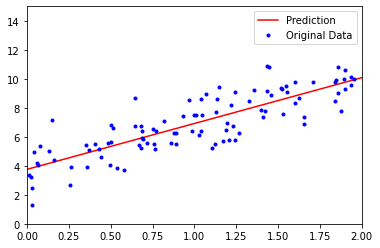

In [ ]:
plt.plot(X_new,y_predict,'r-',label='Prediction')
plt.plot(X,y,'b.',label='Original Data')
plt.legend()
plt.axis([0,2,0,15])
plt.show()

# Performing Linear Regressing using Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.75573987]), array([[3.16347794]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 3.75573987],
       [10.08269575]])

The class is based on the *scipy.linalg.lstsq()* function (the name stands for “least squares”),

In [ ]:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[3.75573987],
       [3.16347794]])

This function computes $\hat \theta= X^+ y$, where $X^+$ is the *pseudoinverse* of X (specifically, the *Moore-Penrose inverse*).

Using *np.linalg.pinv()* to compute pseudoinverse directly.

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[3.75573987],
       [3.16347794]])

The pseudoinverse itself is computed using a standard matrix factorization technique called *Singular Value Decomposition* (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices **U Σ $V^T$.**

The pseudoinverse is computed as
$X^+$=V $Σ^+$ $U^T$

To compute the matrix , the algorithm takes **Σ** and sets to zero all values smaller than a tiny threshold value, then it replaces all the nonzero values with their inverse, and finally it transposes the resulting matrix.

This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix $X^T$ $X$ is not invertible (i.e., *singular* (having determinant zero)), such as if m < n or if some features are redundant, but the pseudoinverse is always defined.

## Computational complexitiy

The Normal Equation computes the inverse of $X^T$ X, which is an *(n + 1) × (n + 1)* matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^3)$, depending on the implementation. In other words, if you double the number of features, you multiply the computation time by roughly $2^{2.4}$ = 5.3 to $2^3$ = 8.

The SVD approach used by Scikit-Learn’s *LinearRegression* class is about $O(n^2)$. If you double the number of features, you multiply the computation time by roughly 4.

---
## Point to consider
* Both the Normal Equation and the SVD
approach get very slow when the number of features grows large (e.g., 100,000). On the positive side, both are linear with regard to the number of instances in the training set (they are O(m)), so they handle large training sets efficiently, provided they can fit in memory.


* Once you have trained your Linear Regression model (using the Normal Equation or any other algorithm), predictions are very fast: the computational complexity is linear with regard to both the number of instances you want to make predictions on and the number of features. In other words, making predictions on twice as many instances (or twice as many features) will take roughly twice as much time.
